In [3]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Reading Files

a=pd.read_csv(r"C:\Users\sarth\OneDrive\Datasets\movies.csv")
df=a.copy()
pd.set_option('display.max_rows',None)

In [5]:
#Checking  Null Values Percentage

for col in df.columns:
    missing_pct=np.mean(df[col].isnull())
    result=np.array(missing_pct,int)
    print('{} - {}%'.format(col,result))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [6]:
#Dropping null values in gross & budget

df.dropna(subset=['gross'], inplace=True)
df.dropna(subset=['budget'], inplace=True)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [7]:
#Changing Datatype of gross and budget columns to integer


df['gross']=df['gross'].astype('int64')
df['budget']=df['budget'].astype('int64')


In [8]:
df['company'].drop_duplicates().sort_values(ascending=True)

4345                      "DIA" Productions GmbH & Co. KG
7525                  "Weathering With You" Film Partners
3024                                      .406 Production
2929                                        1492 Pictures
385                                      1818 Productions
4412                                     19 Entertainment
7109                                           1978 Films
6517                     1984 Private Defense Contractors
4151                                         2 Loop Films
7489                                    2.0 Entertainment
5195                                         2.4.7. Films
4559                                     2003 Productions
7651                                 20th Century Studios
6528                                21 Laps Entertainment
1700                        21st Century Film Corporation
2584                                   21st Century Films
4118                                25th Hour Productions
5597          

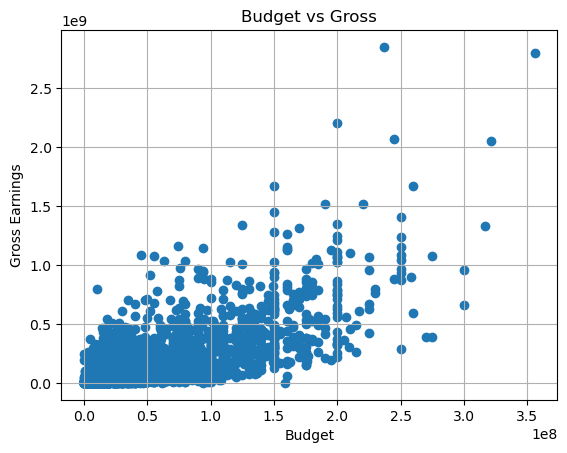

In [9]:
#Coorelations

#Scatter Plot btw gross and budget

plt.scatter(x=df['budget'],y=df['gross'])
plt.title("Budget vs Gross")
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.grid()
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

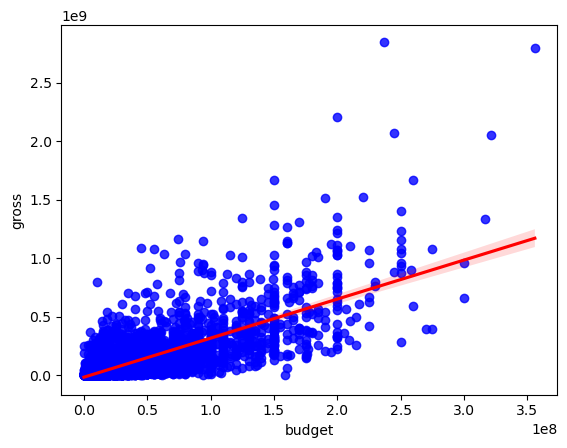

In [10]:
#Regression Plot btw gross earnings and budget 

import seaborn as sns

sns.regplot(x=df['budget'],y=df['gross'],data=df,scatter_kws={'color':'blue'},line_kws={'color':'red'})

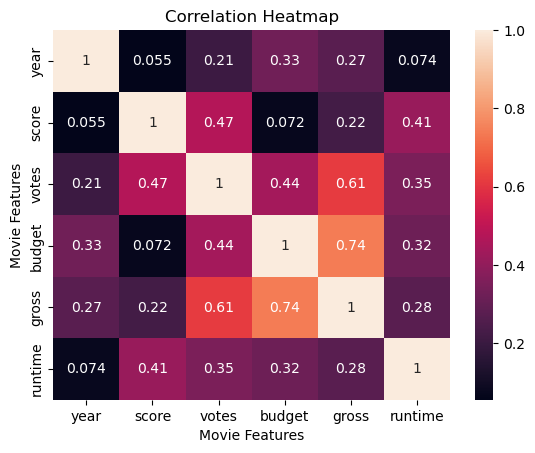

In [13]:
correlation_matrix = df.corr(method="pearson" , numeric_only=True)

sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Heatmap")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [16]:
df2=df.copy()

for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col]=df2[col].astype('category')
        df2[col]=df2[col].cat.codes
        

df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [17]:
df2.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4706,6,6,1980,1308,8.4,927000.0,1800,2841,700,46,19000000,46998772,1432,146.0
1,3943,6,1,1980,1131,5.8,65000.0,1581,1160,215,47,4500000,58853106,454,104.0
2,3654,4,0,1980,1363,8.7,1200000.0,759,1822,1161,47,18000000,538375067,949,124.0
3,205,4,4,1980,1131,7.7,221000.0,891,1416,1478,47,3500000,83453539,1114,88.0
4,734,6,4,1980,1174,7.3,108000.0,721,352,272,47,6000000,39846344,1089,98.0


In [42]:
Num_Corr = df2.corr(method='pearson')

corr_pairs=Num_Corr.unstack()
# high_corr=corr_pairs[(corr_pairs)>0.5]
corr_pairs=corr_pairs.sort_values(ascending=False)
corr_pairs

name      name        1.000000
rating    rating      1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
director  director    1.000000
runtime   runtime     1.000000
gross     budget      0.740395
budget    gross       0.740395
votes     gross       0.614904
gross     votes       0.614904
votes     score       0.473809
score     votes       0.473809
budget    votes       0.440021
votes     budget      0.440021
runtime   score       0.414580
score     runtime     0.414580
votes     runtime     0.352437
runtime   votes       0.352437
budget    year        0.327781
year      budget      0.327781
runtime   budget      0.318595
budget    runtime     0.318595
gross     runtime     0.275596
runtime 

In [ ]:
                                                        #RESULT

# Votes,Score and Budget has the highest correlation with gross earnings .
#Company has very low correlation with gross earnings .